# Tutorial 9 - Unsupervised Learning

*Written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition

---
## This week's lab:

In previous weeks we talked about some regression and classification methods that can be used for supervised learning. In supervised learning, we have *n* observations from a set of predictors, which make up our design matrix *X*, and the associated responses *Y*. The goal is to learn a mapping from X (inputs) to Y (outputs) so that the model can predict *$\hat{Y}$* for new, unseen data.   

This week we will introduce you to unsupervised learning, where we only have X, but not the associated responses Y. In this case we are not interested in prediction, but in discovering interesting things underlying X. Two main interests would be: **clustering**, where we group the data into clusters of similar items, and **dimensionality reduction**, where we reduce the number of variables under consideration by obtaining a set of principal variables.

**Learning goals:** \
When finishing this tutorial, you should be able to know how to perform ...
1. Multivariate gaussian distribution
2. Gaussian mixture model and k-means
3. K-means for image processing
4. Simulating n-dimensional random gaussian data

<div class='alert alert-danger'>Please complete all parts of this tutorial.</div>

---

## 1. Import libraries

In [ ]:
import os
import zipfile
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import requests
from sklearn.manifold import MDS


def download_file(filename, url):
    if not os.path.isfile(filename):
        with requests.get(url) as fo:
            open(filename, "wb").write(fo.content)
        print(f"{filename} downloaded.")
    else:
        print(f"{filename} already available.")


download_file(
    "cat.png", "https://ucloud.univie.ac.at/index.php/s/gbE9ebGT9aqtC5E/download"
)

## 2. Create multidimentional Gaussian data

Before we start talking about unsupervised learning methods, let's simulate some multivariate normally distributed data (one-dimensional (univariate) normal (Gaussian) distribution to higher dimensions). To generate such data, we can use the `np.random.multivariate_normal()` function. It requires a 1D array to represent the mean of each dimension for the N-dimensional distribution, and a symmetric covariance matrix where the diagonal elements are the variances of each dimension and the off-diagonal elements contain the covariances between dimensions: 

$$
\left [
\begin{matrix}
Var(x_1)  & \cdots & Cov(x_1, x_n) \\
\vdots & \ddots  & \vdots \\
Cov(x_n, x_1)  & \cdots & Var(x_n) \\ 
\end{matrix} 
\right ] 
$$

Try to make some independent (covariances between dimensions are 0) 2D Gaussian data with mean=0, variance=1 for each dimension. Hint: the `np.eye()` function returns an identity matrix. 

In [ ]:
n_obv = 100 # number of data 

my_means = # YOUR CODE HERE
my_covar = # YOUR CODE HERE
my_sim_data = # YOUR CODE HERE

# Visulization
fig, ax = plt.subplots()
ax.scatter(my_sim_data[:, 0], my_sim_data[:, 1])
ax.set_xlabel('variable 1',fontsize=14)
ax.set_ylabel('variable 2',fontsize=14)
ax.set_title('Independent data')

You can also try different values for off-diagnal elements of the covariance matrix below to make data positively/ngatively correlated, also for diagnal elements to change the variances of each dimension, and see how the plot changes. 



In [ ]:
my_covar[0, 1] = # Change values here
my_covar[1, 0] = # Change values here
my_covar[0, 0] = # Change values here
my_covar[1, 1] = # Change values here
print(my_covar)

my_sim_data = # YOUR CODE HERE

# Visulization
fig, ax = plt.subplots()
ax.scatter(my_sim_data[:, 0], my_sim_data[:, 1])
ax.set_xlabel('variable 1',fontsize=14)
ax.set_ylabel('variable 2',fontsize=14)
plt.title('Dependent data')

**Fit Gaussian Mixture Model**

Now, let's try something more advanced. We first make 3 datasets with different means for the variables and combine them into a single array. 

In [ ]:
n_obv = 100
mean_1, mean_2, mean_3 = [-4, 0], [5, 2], [1, 1]
cov_1, cov_2, cov_3 = np.eye(2), np.eye(2), np.eye(2)

data_1 = np.random.multivariate_normal(mean_1, cov_1, n_obv)
data_2 = np.random.multivariate_normal(mean_2, cov_2, n_obv)
data_3 = np.random.multivariate_normal(mean_3, cov_3, n_obv)
three_data = np.vstack((data_1, data_2, data_3))

# Visulize three dataset
fig, ax = plt.subplots()
ax.scatter(three_data[:, 0], three_data[:, 1], alpha=0.6)
ax.set_xlabel("variable 1", fontsize=14)
ax.set_ylabel("variable 2", fontsize=14)

We then fit the combined three datasets to the Gaussian Mixture Model (GMM). The Gaussian Mixture Model is a clustering technique commonly used in unsupervised learning. It assumes that a given data set is generated from a mixture of several Gaussian distributions, and attempts to determine the probability that a given data point belongs to a distribution/cluster.

In [ ]:
from sklearn.mixture import GaussianMixture

# Set up model
gm = GaussianMixture(n_components=3)  # The number of mixture components.

Next, we fit the gaussian mixture model and print the means, covariances, and the score of the fitted model. We also print the Bayesian Information Criterion and the Akaike Information Criterion, which also measure the goodness of fit.

In [ ]:
gm.fit(three_data)

print("Means:", "\n", gm.means_, "\n")
print("Covariances:", "\n", gm.covariances_, "\n")
print("Score:", gm.score(three_data))  # Average log-likelihood
print("BIC:", gm.bic(three_data))
print("AIC:", gm.aic(three_data))

What do you observe? You can also change the 'n_components' argument and print out all the parameters to see how they change. Again, what do you observe?

Another way to explore the data here is to use the `predict()` method. The `fit()` method estimates model parameters, whereas the `predict()` method predicts the labels for the data samples.

In [ ]:
gm.predict(three_data)
print("Lable for each data point:", "\n", gm.predict(three_data))

# Visulization
plt.scatter(three_data[:, 0], three_data[:, 1], c=gm.predict(three_data))
plt.xlabel("variable 1", fontsize=14)
plt.ylabel("variable 2", fontsize=14)

Great! The model can uncover the underlying data structure and does a good job of identifying the subpopulation from the total population! Can you calculate the prediction accuracy in the cell below? Hint: predication accuracy = (number of correct predictions) / (total number of predictions).

In [ ]:
# YOUR CODE HERE

### Further exploration

Use the dataset `three_data` from before to perform the following tasks:

1. Fit a Gaussian mixture model where the number of components varies from 1 to 8, you can use a for loop to do this. 
2. Calculate and record the model fit measures of AIC and BIC for each number of components (lower values indicate better model fit)
3. Plot the results on a single graph with the number of components on the x-axis and both AIC and BIC on the y-axis (i.e. plot one line for AIC and another line for BIC).
4. Add axis labels and legends, and customize the plot to make it look nicer (font size, colour, line width, etc.)

What number of components gives the best model fit?

In [ ]:
# YOUR CODE HERE

## 3. K-means

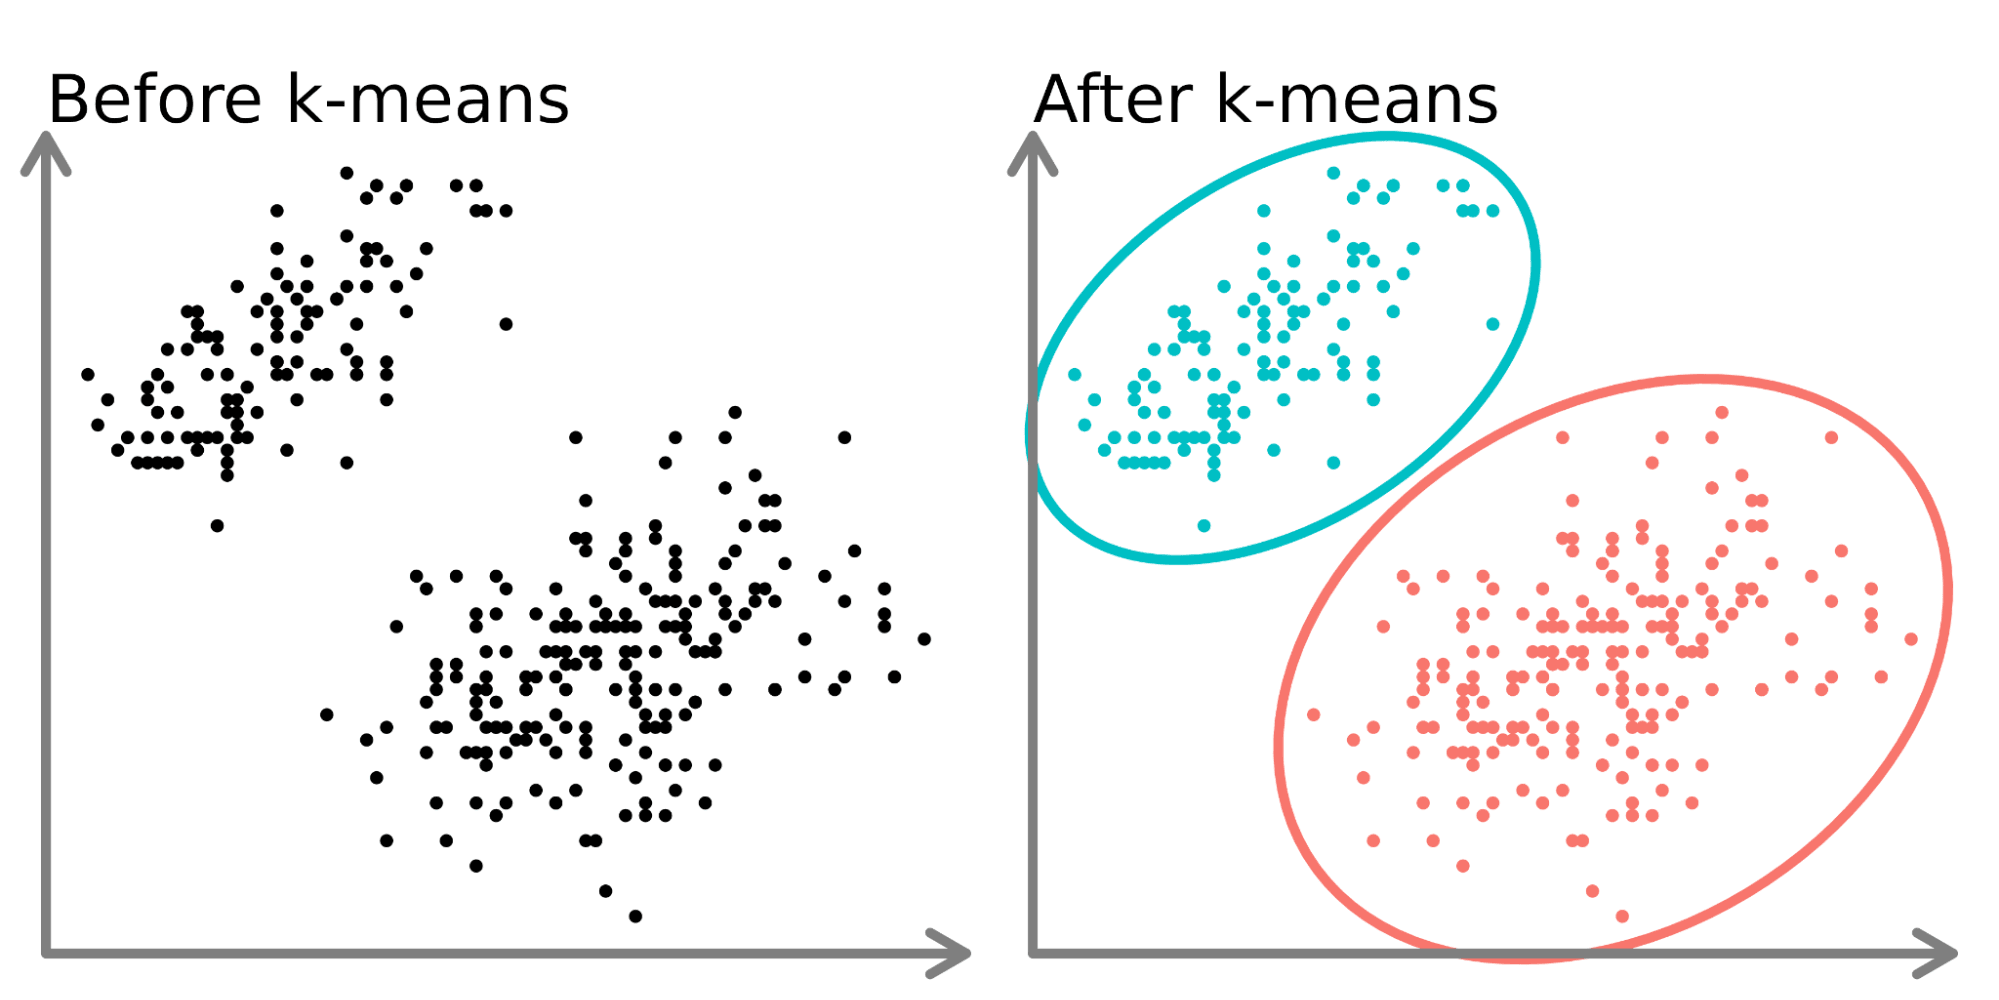

We will use the K-means algorithm (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for clustering and image compression. In terms of cognitive science and psychology, by reducing the number of colors in an image, K-means can be seen as a model of the human brain's ability to group similar stimuli, increasing cognitive efficiency by simplifying visual information, focusing on essential features, and abstracting less critical details, similar to lossy compression where some data is intentionally lost to increase efficiency. Understanding these parallels can lead to improvements in the design of data compression algorithms that better mimic human perceptual and cognitive systems, optimizing both the technological and user experience aspects by reducing cognitive load while maintaining or improving perceptual clarity.

In [ ]:
from sklearn.cluster import KMeans

First, use the `three_data` variable and try to repeat the model fitting workflow above using k-means instead of the Gaussian mixture model. Then visualize the result on the same data. Do you get the same distribution with the 2 methods?

In [ ]:
# YOUR CODE HERE

Due to computational issues, we import `MiniBatchKMeans` for the following part. It's faster than `KMeans` and gives just slightly different results. 

In [ ]:
from PIL import Image
from sklearn.cluster import MiniBatchKMeans

image = np.asarray(
    Image.open("cat.png")
)  # my (Mengfan's) adorable cat in her favourite sink
# you can also use your photo, just replace 'cat.png' to your file path

In [ ]:
plt.imshow(image)
print("resolution:", image.shape)

The imported image is very similar to a 3D array and indexable. The first two dimensions represent the number of pixels along the width and height, and the third dimension represents the depth of colour (such as RGB values).

In [ ]:
plt.imshow(image[100:340, 470:730, :])

Okay, we need to transform this lovely cat image into grayscale and reshape it to a 1D array for unsupervised learning next step.

In [ ]:
# transform to grayscale
gray_img = np.mean(image, 2)
print(gray_img.shape)
plt.imshow(gray_img, cmap=plt.get_cmap("gray"))

In [ ]:
# reshape 2D gray image to 1D
gray_img_1d = gray_img.reshape(-1, 1)
print(gray_img_1d.shape)

plt.hist(gray_img_1d)
plt.show()

Now it's time to set up the k-means algorithm, and we will use the 1d array of pixel values to fit the model. 

In [ ]:
km = MiniBatchKMeans(n_clusters=3)
km.fit(gray_img_1d)

In [ ]:
print("cluster centers:", "\n", km.cluster_centers_)

Let's randomly select 100 pixels from the image to look at their original values and the predicted labels.

In [ ]:
idx = np.random.choice(range(len(gray_img_1d)), 100, replace=False)

print("Original values:", "\n", gray_img_1d[idx].T, "\n")
print("Prediction:", "\n", km.predict(gray_img_1d)[idx])

**Recover clustered image**

Now we want to do something ambitious. We'd like try to recover the image from the model predictions and see whether it works or not. 

In [ ]:
# First, we reshape the predicted 1d array back to the original shape of the image
gray_img_recovered = km.predict(gray_img_1d).reshape(gray_img.shape)
print(gray_img_recovered.shape)
print(km.cluster_centers_.shape)

# Then we replace the cluster labels with their center values
gray_img_recovered = km.cluster_centers_[gray_img_recovered]
print(gray_img_recovered.shape)

In [ ]:
plt.imshow(gray_img_recovered, cmap="gray");

It's great to see that the image could be roughly reconstructed from the model prediction!

## 4. MDS example with real experimental data

In this section, we will use some empirical data to demonstrate a dimension reduction technique called multidimensional scaling (MDS; https://doi.org/10.1126/science.3629243). It is used in data analysis for visually exploring similarities or dissimilarities of things like images, concepts, objects or other stimuli by transforming data points into a geometric space where the distances between points reflect their relatedness, often applied in fields like psychology, marketing, and bioinformatics to identify underlying patterns in complex data sets. It is a popular cognitive model that provides a way to represent and analyze how people perceive and mentally organize complex information. 

An MDS model incorporates a matrix of distances (or dissimilarities). This matrix is constructed by collecting similarity judgments from participants, typically by presenting them with two stimuli and asking them to rate how similar they think they are. We have some similarity judgments ready. The dataset (about images of fruits) we use here is taken from Peterson et al. (2018), https://doi.org/10.1111/cogs.12670. Let's download the data first. 

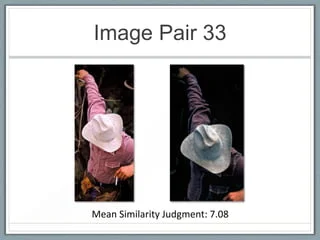

In [ ]:
def download_file(filename, url):
    """Download file from url and store it under specified filename."""

    if not os.path.isfile(filename):
        with requests.get(url) as fo:
            open(filename, "wb").write(fo.content)
        print(f"{filename} downloaded.")
    else:
        print(f"{filename} already available.")


def unzip_file(zip_filepath, extract_to_folder):
    """Unzip a zip file to a specified folder."""

    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    with zipfile.ZipFile(zip_filepath, "r") as zip_ref:
        zip_ref.extractall(extract_to_folder)
        print(f"Files extracted to {extract_to_folder}")


FILEPATH = "data_peterson_2018.zip"

download_file(
    FILEPATH,
    "https://ucloud.univie.ac.at/index.php/s/Yi2BbmWqcZRnbfH/download",
)
unzip_file(FILEPATH, "./")
filenames = sorted(glob(os.path.join("data_peterson_2018", "fruits", "*.png")))

In [ ]:
veg_data = np.load(
    os.path.join("data_peterson_2018", "individual_level_similarity_data.npy"),
    allow_pickle=True,
).item()["fruits"]

In [ ]:
# let's quickly check the stimuli (we have stored the filenames in the variable with the same name)

filenames[:5]

In [ ]:
plt.imshow(plt.imread(filenames[0]))

Now that we have a feeling what our data looks like we can start analyzing it. Each stimulus pair has been rated by 10 participants, i.e. for each pair you will find a list of 10 similarity ratings. Our task is it to

1. build the average of these ratings for each stimulus pair  
2. Construct a matrix in which row 0, column 1 contains the average rating between the first and the second stimulus, etc. (hint: this looks similar to a correlation table).  
3. Scale the values in the matrix that they range between 0 and 1.  
4. Convert the values from similarity values to dissimilarity (or distance) values (hint: you only need to subtract the values from 1 -> 1 - Matrix)  
5. Create an instance of `MDS` that we imported at the beginning of the notebook for 2 dimensions (i.e., setting `n_components` to 2) that we will then later fit to our precomputed dissimilarity matrix `D` (that means you will also need to set `dissimilarity="precomputed"`).  
6. Once you have the model you can fit it to `D` using the `fit_transform()` method and store the results in the variable `emb`  
7. Plot the results using the function `plot_mds()`  

1. Build average of the individual similarity ratings

The dataset contains 120 stimuli. We will start by creating an empty 120x120 matrix as a numpy array called `D`. Then we can iterate over our `veg_data` dictionary and compute for each pair the average and store this value in the matrix. As such a matrix is symmetric we need to add the value twice, once as `D[stim_a_idx][stim_b_idx] = average_value` and once as `D[stim_b_idx][stim_a_idx] = average_value`.

In [ ]:
# 1. create matrix D

# YOUR CODE HERE

# 2. iterate over veg_data and compute average rating

for key in veg_data.keys():

    # we already provide the code for extracting the indices

    stim_a, stim_b = key.split(", ")
    stim_a_idx = int(stim_a[5:-4]) - 1
    stim_b_idx = int(stim_b[5:-4]) - 1

    # access the values inside veg_data using the key
    # and compute the mean, then store it in D
    # average_value = ...

    # YOUR CODE HERE

In [ ]:
# SANITY CHECK


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)


if check_symmetric(D):
    print("Good job. Your matrix is symmetric!")
else:
    raise Exception("Something went wrong. Your matrix is NOT symmetric!")

In [ ]:
# 3. scale the values to range from 0 to 1 (hint: the current scale is from 0 to 10)

# YOUR CODE HERE


# 4. reverse the values by subtracting from 1

# YOUR CODE HERE

In [ ]:
# 4. create model using MDS
# for better convergence we recommend using the following parameters:
# max_iter=10_000,
# eps=1e-100,
# metric=True,
# normalized_stress=False,

# YOUR CODE HERE

In [ ]:
# 5. fit the model to the data (D) and store
# results in variable emb, but don't use the fit() method
# (see above).

# YOUR CODE HERE

In [ ]:
# SANITY CHECK

if emb.shape == (120, 2):
    print(
        "Your embedding looks correct, it contains 2-dimensional coordinates for our 120 stimuli."
    )
else:
    raise Exception(
        "Something went wrong. Your embedding does not have the correct shape!"
    )

Below we provide the code to visualize the model, you don't need to understand the code itself, but focus on understanding the resulting plot. 

In [ ]:
import seaborn as sns
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image, ImageDraw


def plot_mds(data, images, zoom, max_size, dpi=100, radius=30):
    fig, ax = plt.subplots(figsize=(9, 9), facecolor="white")

    def rounded_square(im, radius=20):
        if len(im.shape) == 2:  # greyscale image
            im = np.stack((im, im, im), axis=-1)
        h, w, t = im.shape
        lum_img = Image.new("L", [h, w], 0)
        draw = ImageDraw.Draw(lum_img)
        draw.rounded_rectangle(((0, 0), (h, w)), radius, fill=255)
        lum_img_arr = np.array(lum_img)
        if t == 4:  # E.g. PNGs
            # lum_img_arr = lum_img_arr / 255
            im = np.multiply(im, lum_img_arr.reshape(h, w, 1))
        else:
            im = np.dstack((im, lum_img_arr))
        im = im.astype(np.uint8)
        return im

    def imscatter(x, y, image, ax=None, zoom=1, max_size=100, radius=20):
        if ax is None:
            ax = plt.gca()
        try:
            image = plt.imread(image)
        except TypeError:
            pass
        resize_ratio = max(image.shape) / max_size

        # only downsize
        if resize_ratio > 1:
            image = image[:: int(resize_ratio), :: int(resize_ratio)]

        short_side = np.min(image.shape[:2])
        clip_size = np.abs(image.shape[0] - image.shape[1]) // 2
        if image.shape[0] >= image.shape[1]:
            image = image[clip_size : clip_size + short_side, :]
        else:
            image = image[:, clip_size : clip_size + short_side]

        image = rounded_square(image, radius)

        im = OffsetImage(image, zoom=zoom)
        x, y = np.atleast_1d(x, y)
        artists = []
        for x0, y0 in zip(x, y):
            ab = AnnotationBbox(im, (x0, y0), xycoords="data", frameon=False)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()

        return None

    x = data[:, 0]
    y = data[:, 1]

    for i, img in enumerate(images):
        imscatter(
            x[i],
            y[i],
            img,
            ax=ax,
            zoom=zoom,
            max_size=max_size,
            radius=radius,
        )

    ax.tick_params(
        labeltop=False,
        labelright=False,
        labelbottom=False,
        labelleft=False,
        bottom=False,
        top=False,
        left=False,
        right=False,
    )


# 7. plot the resulting MDS embedding

plot_mds(
    emb,
    filenames,
    zoom=0.20,
    max_size=151,
    dpi=240,
    radius=40,
)

**Q: What do you observe?**

As a final step, please perform a **sanity check**. If your procedure above was correct, the distances between the stimuli in the MDS embedding `emb`, as shown in the plot, should roughly match the distance matrix we used to create this embedding. There is a function in scikit-learn's `metrics` submodule called `pairwise_distances`. Import it and compute a new distance matrix `D_mds` from `emb`. Then compare the two distance matrices using a method of your choice.

In [ ]:
# YOUR CODE HERE
# --------------




# --------------